# 21. GRADUATE ADMISSIONS: DATA EXPLORATION
---

## 1. Introducing the Data
- **Source**: [Kaggle](https://www.kaggle.com/mohansacharya/graduate-admissions)
- **Context**: Prediction of Graduate Admissions from important parameters
- **Content**: The dataset contains the following parameters:
    - GRE Scores ( out of 340 )
    - TOEFL Scores ( out of 120 )
    - University Rating ( out of 5 )
    - Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
    - Undergraduate GPA ( out of 10 )
    - Research Experience ( either 0 or 1 )
    - Chance of Admit ( ranging from 0 to 1 )
- **Citation**: *Mohan S Acharya, Asfia Armaan, Aneeta S Antony : A Comparison of Regression Models for Prediction of Graduate Admissions, IEEE International Conference on Computational Intelligence in Data Science 2019*
- **License**: CC0: Public Domain
- **Dataset**:
    - Source file: `Admission_Predict_Ver1.1.csv`
    - Saved as: `Admission_1.1`

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

admission = pd.read_csv('data/Admission_1.1.csv')
print(admission.shape)
admission.head()

(500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
admission_1 = admission.drop('Serial No.', axis=1)
admission_1.shape

(500, 8)

## 2. Train-Test Splitting

In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(admission_1, test_size=0.2, random_state=42)
print('Train:', train.shape, '\n', 'Test:', test.shape)

Train: (400, 8) 
 Test: (100, 8)


## 3. Understanding the Data Types
From sampling the first 5 rows above, it doesn't look like we have any columns in string form. They are in either `integer` or `float`

In [7]:
train.dtypes.value_counts()

int64      4
float64    4
dtype: int64

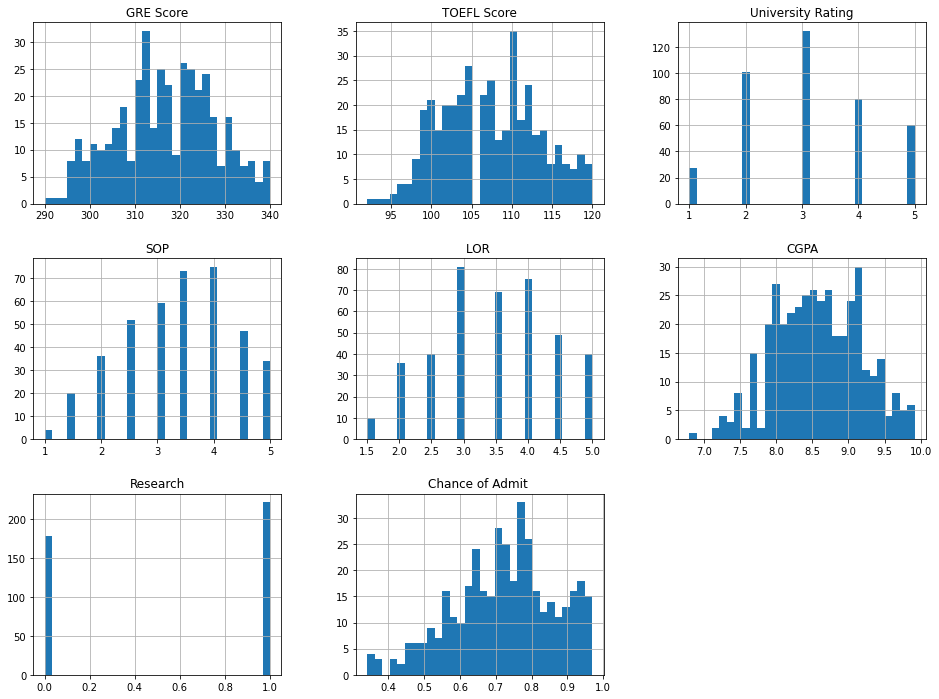

In [11]:
import matplotlib.pyplot as plt

train.hist(bins=30, figsize=(16,12))
plt.show()

- From the histograms above, we can see that there are 4 `continuous` attributes:
    - `GRE Score`
    - `TOEFL Score`
    - `CGPA`
    - `Chance of Admit`
- The other 4 attributes are `ordinal`:
    - `University Ranking` - 5 scales: 1-5
    - `SOP` - 9 scales: 1-5
    - `LOR` - 8 scales: 1.5-5.0
    - `Research` - 2 scales = binary: 0-1